<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_Confidence_Interval_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Financial Python
## Confidence Interval and Hypothesis Testing

- Ref: https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing#Confidence-Interval-and-Hypothesis-Testing-Introduction


In [12]:
# https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing#Confidence-Interval-and-Hypothesis-Testing-Introduction


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'''
qb = QuantBook()
spy = qb.AddEquity("SPY").Symbol
'''
#get SPY data from August 2010 to the present
'''
start_date = datetime(2010, 8, 1, 0, 0, 0)
end_date = qb.Time
spy_table = qb.History(spy, start_date, end_date, Resolution.Daily)

spy_total = spy_table[['open','close']]
'''
#
# 上面主要是撈資料，原作者用了私有的模組 QuantBook 
# 那個東西我沒有，也暫時不想去網路尋找，因此就自創一段來修補，以便連接....
#
import pandas_datareader as pdr

spy_table= pdr.get_data_yahoo('SPY',start='2010-08')
spy_table
spy_total= spy_table[['Open','Close']]
spy_total.columns= ['open','close']


In [27]:
# 先喵一下我撈到了啥資料？
# Google: 【spy yahoo finance】
# https://finance.yahoo.com/quote/SPY/chart?p=SPY#eyJpbnRlcnZhbCI6IndlZWsiLCJwZXJpb2RpY2l0eSI6MSwiY2FuZGxlV2lkdGgiOjEsImZsaXBwZWQiOmZhbHNlLCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6ImJhciIsImV4dGVuZGVkIjp0cnVlLCJtYXJrZXRTZXNzaW9ucyI6eyJwcmUiOnRydWUsInBvc3QiOnRydWV9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjowLjg4LCJkaXNwbGF5IjoiU1BZIiwiY2hhcnROYW1lIjoiY2hhcnQiLCJpbmRleCI6MCwieUF4aXMiOnsibmFtZSI6ImNoYXJ0IiwicG9zaXRpb24iOm51bGx9LCJ5YXhpc0xIUyI6W10sInlheGlzUkhTIjpbImNoYXJ0Iiwi4oCMdm9sIHVuZHLigIwiXX0sIuKAjHJzaeKAjCAoMjAsQykiOnsicGVyY2VudCI6MC4xMiwiZGlzcGxheSI6IuKAjHJzaeKAjCAoMjAsQykiLCJjaGFydE5hbWUiOiJjaGFydCIsImluZGV4IjoxLCJ5QXhpcyI6eyJuYW1lIjoi4oCMcnNp4oCMICgyMCxDKSIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyLigIxyc2nigIwgKDIwLEMpIl19fSwic2V0U3BhbiI6bnVsbCwibGluZVdpZHRoIjoyLCJzdHJpcGVkQmFja2dyb3VuZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiM3NjdkODQiLCJzdHJpcGVkQmFja2dyb3VkIjp0cnVlLCJyYW5nZSI6bnVsbCwiZXZlbnRNYXAiOnsiY29ycG9yYXRlIjpbXSwic2lnRGV2Ijp7fX0sImN1c3RvbVJhbmdlIjpudWxsLCJzeW1ib2xzIjpbeyJzeW1ib2wiOiJTUFkiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiU1BZIiwicXVvdGVUeXBlIjoiRVRGIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IkFtZXJpY2EvTmV3X1lvcmsifSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoid2VlayIsInNldFNwYW4iOm51bGx9XSwid2lkdGgiOjQsInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjZmYzMzNhIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6ImNoYXJ0In19LCLigIx2b2wgcHJvZmlsZeKAjCI6eyJ0eXBlIjoidm9sIHByb2ZpbGUiLCJpbnB1dHMiOnsiaWQiOiLigIx2b2wgcHJvZmlsZeKAjCIsImRpc3BsYXkiOiLigIx2b2wgcHJvZmlsZeKAjCJ9LCJvdXRwdXRzIjp7IkJhcnMgQ29sb3IiOiIjYjY0YTk2In0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7ImRpc3BsYXlCb3JkZXIiOnRydWUsImRpc3BsYXlWb2x1bWUiOmZhbHNlLCJudW1iZXJPZkJhcnMiOjMwLCJ3aWR0aFBlcmNlbnRhZ2UiOjAuMjUsImNoYXJ0TmFtZSI6ImNoYXJ0IiwicGFuZWxOYW1lIjoiY2hhcnQifX0sIuKAjHJzaeKAjCAoMjAsQykiOnsidHlwZSI6InJzaSIsImlucHV0cyI6eyJQZXJpb2QiOiIyMCIsIkZpZWxkIjoiQ2xvc2UiLCJpZCI6IuKAjHJzaeKAjCAoMjAsQykiLCJkaXNwbGF5Ijoi4oCMcnNp4oCMICgyMCxDKSJ9LCJvdXRwdXRzIjp7IlJTSSI6IiNhZDZlZmYifSwicGFuZWwiOiLigIxyc2nigIwgKDIwLEMpIiwicGFyYW1ldGVycyI6eyJzdHVkeU92ZXJab25lc0VuYWJsZWQiOnRydWUsInN0dWR5T3ZlckJvdWdodFZhbHVlIjoiNTAiLCJzdHVkeU92ZXJCb3VnaHRDb2xvciI6IiM3OWY0YmQiLCJzdHVkeU92ZXJTb2xkVmFsdWUiOiI1MCIsInN0dWR5T3ZlclNvbGRDb2xvciI6IiNmZjgwODQiLCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6IuKAjHJzaeKAjCAoMjAsQykifX19fQ--

spy_total


,open,close
Date,,
2010-08-02,111.989998,112.760002
2010-08-03,112.480003,112.220001
2010-08-04,112.529999,112.970001
2010-08-05,112.250000,112.849998
2010-08-06,111.739998,112.389999
...,...,...
2021-06-08,423.109985,422.279999
2021-06-09,423.179993,421.649994
2021-06-10,422.959991,423.609985


In [28]:
#calculate log returns
spy_log_return = np.log(spy_total.close).diff().dropna()
print('Population mean:', np.mean(spy_log_return))
#[out]: Population mean: 0.000443353825615
print('Population standard deviation:',np.std(spy_log_return))
#[out]: Population standard deviation: 0.00784267293815



Population mean: 0.00048535249884885
Population standard deviation: 0.01075169962667365


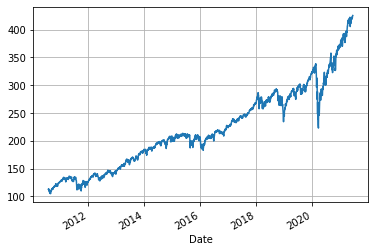

In [31]:
# 原作者只用到 上面 Dataframe 的 'close' 這個欄 (column)
X= spy_total.close 
# 或者
X= spy_total['close']
X
X.plot(grid=True)



In [15]:
print('10 days sample returns:', np.mean(spy_log_return.tail(10)))
#[out]: 10 days sample returns: 0.000845189915474
print('10 days sample standard deviation:', np.std(spy_log_return.tail(10)))
#[out]: 10 days sample standard deviation: 0.00313558001122
print('1000 days sample returns:', np.mean(spy_log_return.tail(1000)))
#[out]: 1000 days sample returns: 0.000462827047221
print('1000 days sample standard deviation:', np.std(spy_log_return.tail(1000)))
#[out]: 1000 days sample standard deviation: 0.00766589174299

10 days sample returns: 0.0012350804361541457
10 days sample standard deviation: 0.003422828669076326
1000 days sample returns: 0.0005602979943605533
1000 days sample standard deviation: 0.013036113231790701


In [16]:
#apply the formula above to calculate confidence interval
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(1000))-1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
upper_2 = np.mean(spy_log_return.tail(1000))+1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
#print the outcomes
print('10 days 95% confidence inverval:', (bottom_1,upper_1))
#[out]: 10 days 95% confidence inverval: (-0.0010982627102681939, 0.002788642541217079)
print('1000 days 95% confidence inverval:', (bottom_2,upper_2))
#[out]: 1000 days 95% confidence inverval: (-1.230984558013321e-05, 0.00093796394002165957)


10 days 95% confidence inverval: (-0.0008864107522674248, 0.0033565716245757163)
1000 days 95% confidence inverval: (-0.00024768867474646284, 0.0013682846634675695)


In [17]:
mean_1000 = np.mean(spy_log_return.tail(1000))
std_1000 = np.std(spy_log_return.tail(1000))
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
s = pd.Series([mean_10,std_10,mean_1000,std_1000],index = ['mean_10', 'std_10','mean_1000','std_1000'])
print(s)

'''
[out]: mean_10      0.000845
       std_10       0.003136
       mean_1000    0.000463
       std_1000     0.007666
'''


mean_10      0.001235
std_10       0.003423
mean_1000    0.000560
std_1000     0.013036
dtype: float64


'\n[out]: mean_10      0.000845\n       std_10       0.003136\n       mean_1000    0.000463\n       std_1000     0.007666\n'

In [18]:
bottom = 0 - 1.64*std_1000/np.sqrt(1000)
upper = 0 + 1.64*std_1000/np.sqrt(1000)
print((bottom, upper))

#[out]: (-0.00039756352254768874, 0.00039756352254768874)


(-0.0006760704782324012, 0.0006760704782324012)


In [19]:
bottom = 0 - 1.96*std_1000/np.sqrt(1000)
upper = 0 + 1.96*std_1000/np.sqrt(1000)
print((bottom, upper))

#[out]: (-0.00047513689280089639, 0.00047513689280089639)


(-0.0008079866691070161, 0.0008079866691070161)


In [20]:
print(np.sqrt(1000)*(mean_1000 - 0)/std_1000)

#[out]: 1.90922032428


1.3591611234878334


In [21]:
import scipy.stats as st
print((1 - st.norm.cdf(1.9488)))

#[out]: 0.025659656888


0.02565965688799665


In [22]:
mean_1200 = np.mean(spy_log_return.tail(1200))
std_1200 = np.std(spy_log_return.tail(1200))
z_score = np.sqrt(1200)*(mean_1200 - 0)/std_1200
print('z-score = ',z_score)
#[out]: z-score =  2.19793023185
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ',p_value)
#[out]: p_value =  0.0139770390655


z-score =  1.582371281814201
p_value =  0.05678241835411302


# Summary

- In this chapter we introduced confidence interval, especially that for the normal distribution, and hypothesis test. Now we know how to test our idea rigorously. Normal distribution and it's confidence interval can be applied to many quantitative finance theories, we will see it frequently in our following tutorials.

# Ref:
- 
https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing#Confidence-Interval-and-Hypothesis-Testing-Introduction
